In [6]:
# Question: Advanced Data Cleaning with Multiple Issues
# Objective: Handle multiple issues in one dataset, including missing values, duplicates, and outliers.
# Description: Given a dataset with various data quality issues, employ multiple data cleaning techniques.

import pandas as pd
import numpy as np

# Step 1: Create a sample dataset with issues
data = {
    'CustomerID': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Name': ['Alice', 'Bob', 'Charlie', 'Daisy', 'Eve', 'Frank', 'Grace', 'Hank', 'Ivy', 'Jack'],
    'Age': [25, 30, np.nan, 22, 120, 28, 27, 35, -5, 40],       # Age has missing and outliers (120, -5)
    'Email': ['alice@example.com', 'bob@example.com', 'charlie@example.com', '', 'eve@example.com',
              'bob@example.com', 'grace@example.com', 'hank@example.com', 'ivy@example.com', 'jack@example.com'],  # Duplicate Email for Bob, one missing email
    'Salary': [50000, 60000, 55000, 70000, 1200000, 55000, 58000, 62000, 59000, None],  # Salary has outlier and missing
    'Phone': ['123-456-7890', '234-567-8901', None, '345-678-9012', '456-789-0123',
              '234-567-8901', '567-890-1234', '678-901-2345', None, '789-012-3456']       # Missing phones & duplicates
}

df = pd.DataFrame(data)
print("Original Data:")
print(df)

# Step 2: Handle Missing Values
# For numerical columns: fill missing with mean
df['Age'] = df['Age'].fillna(df['Age'][df['Age'].between(0,100)].mean())  # Mean of plausible ages only
df['Salary'] = df['Salary'].fillna(df['Salary'][df['Salary'] < 1e6].mean())  # Ignore outlier when calculating mean

# For categorical columns: fill missing with 'Unknown' or empty string
df['Email'] = df['Email'].replace('', np.nan)
df['Email'] = df['Email'].fillna('Unknown')
df['Phone'] = df['Phone'].fillna('Unknown')

# Step 3: Remove duplicates (based on Email and Phone)
df = df.drop_duplicates(subset=['Email', 'Phone'], keep='first')

# Step 4: Handle Outliers
# For Age: Set ages outside 0-100 to NaN and fill with mean age
df.loc[~df['Age'].between(0, 100), 'Age'] = np.nan
mean_age = df['Age'].mean()
df['Age'] = df['Age'].fillna(mean_age)

# For Salary: Cap salaries at 99th percentile
salary_cap = df['Salary'].quantile(0.99)
df.loc[df['Salary'] > salary_cap, 'Salary'] = salary_cap

# Step 5: Reset index after cleaning
df = df.reset_index(drop=True)

print("\nCleaned Data:")
print(df)


Original Data:
   CustomerID     Name    Age                Email     Salary         Phone
0           1    Alice   25.0    alice@example.com    50000.0  123-456-7890
1           2      Bob   30.0      bob@example.com    60000.0  234-567-8901
2           3  Charlie    NaN  charlie@example.com    55000.0          None
3           4    Daisy   22.0                         70000.0  345-678-9012
4           5      Eve  120.0      eve@example.com  1200000.0  456-789-0123
5           6    Frank   28.0      bob@example.com    55000.0  234-567-8901
6           7    Grace   27.0    grace@example.com    58000.0  567-890-1234
7           8     Hank   35.0     hank@example.com    62000.0  678-901-2345
8           9      Ivy   -5.0      ivy@example.com    59000.0          None
9          10     Jack   40.0     jack@example.com        NaN  789-012-3456

Cleaned Data:
   CustomerID     Name        Age                Email     Salary  \
0           1    Alice  25.000000    alice@example.com    50000.0

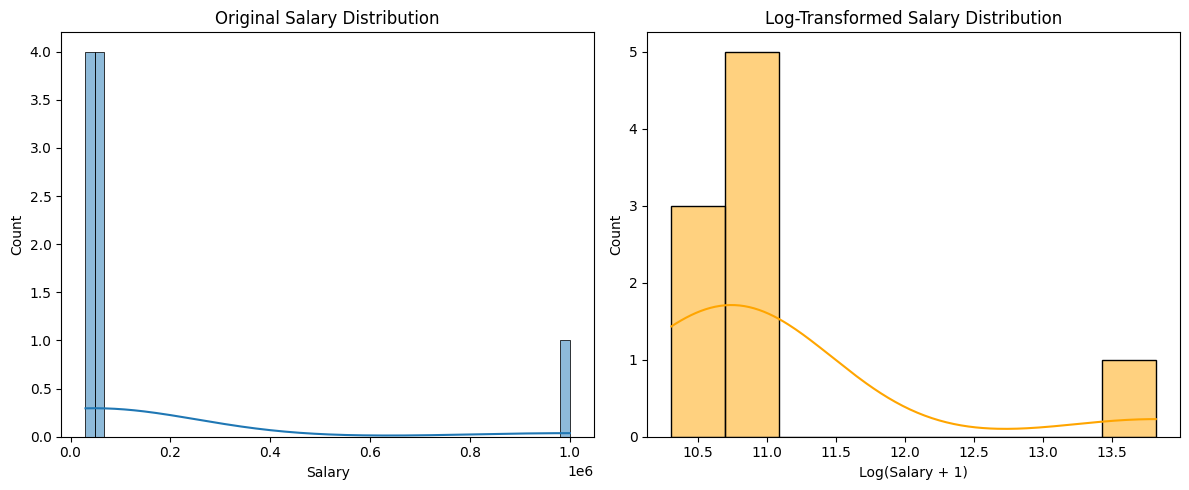

In [7]:
# Question: Data Transformation Techniques
# Objective: Transform skewed data using log transformation.
# Description: Perform a log transformation to handle skewness in a dataset, which is particularly useful for
# certain machine learning models.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Sample skewed data: Salary with right skew (outliers on high end)
data = {
    'Salary': [30000, 35000, 40000, 45000, 50000, 55000, 60000, 65000, 1000000]
}
df = pd.DataFrame(data)

# Plot original distribution
plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
sns.histplot(df['Salary'], kde=True)
plt.title('Original Salary Distribution')
plt.xlabel('Salary')

# Apply log transformation (add 1 to avoid log(0))
df['Salary_log'] = np.log1p(df['Salary'])

# Plot transformed distribution
plt.subplot(1, 2, 2)
sns.histplot(df['Salary_log'], kde=True, color='orange')
plt.title('Log-Transformed Salary Distribution')
plt.xlabel('Log(Salary + 1)')

plt.tight_layout()
plt.show()


In [8]:
# Question: Feature Engineering by Creating New Features
# Objective: Create a new feature based on existing features to add predictive power.
# Description: Generate additional features from existing data to potentially improve the performance of
# prediction models.

import pandas as pd

# Sample data
data = {
    'CustomerID': [1, 2, 3, 4, 5],
    'Age': [22, 35, 58, 44, 27],
    'Annual_Income': [25000, 48000, 75000, 62000, 30000]
}

df = pd.DataFrame(data)

# 1. Create Age Group feature
def age_group(age):
    if age < 30:
        return 'Young'
    elif 30 <= age < 50:
        return 'Middle-aged'
    else:
        return 'Senior'

df['Age_Group'] = df['Age'].apply(age_group)

# 2. Create Income Bracket feature
def income_bracket(income):
    if income < 40000:
        return 'Low'
    elif 40000 <= income < 70000:
        return 'Medium'
    else:
        return 'High'

df['Income_Bracket'] = df['Annual_Income'].apply(income_bracket)

# 3. Create Income per Year of Age
df['Income_per_Year'] = df['Annual_Income'] / df['Age']

print(df)



   CustomerID  Age  Annual_Income    Age_Group Income_Bracket  Income_per_Year
0           1   22          25000        Young            Low      1136.363636
1           2   35          48000  Middle-aged         Medium      1371.428571
2           3   58          75000       Senior           High      1293.103448
3           4   44          62000  Middle-aged         Medium      1409.090909
4           5   27          30000        Young            Low      1111.111111


In [9]:
# Question: Handling Complex Outliers with Z-Scores
# Objective: Detect and handle outliers using Z-score method.
# Description: Use the Z-score method to identify outliers which significantly differ from the rest of the data points.

import pandas as pd
import numpy as np
from scipy.stats import zscore

# Sample data with an obvious outlier (value 1000)
data = {
    'ID': range(1, 11),
    'Sales': [250, 270, 260, 280, 255, 245, 300, 290, 275, 1000]  # 1000 is an outlier
}

df = pd.DataFrame(data)

# Calculate Z-scores for the 'Sales' column
df['Z_score'] = zscore(df['Sales'])

# Detect outliers using a threshold (e.g., |Z| > 3)
outliers = df[np.abs(df['Z_score']) > 3]

print("Detected Outliers:")
print(outliers)

# Option 1: Remove outliers
df_cleaned = df[np.abs(df['Z_score']) <= 3].copy()

# Option 2: Cap outliers (Winsorizing) - Replace extreme values with closest non-outlier boundary
upper_limit = df['Sales'][df['Z_score'].abs() <= 3].max()
lower_limit = df['Sales'][df['Z_score'].abs() <= 3].min()

df['Sales_capped'] = df['Sales'].apply(
    lambda x: upper_limit if x > upper_limit else (lower_limit if x < lower_limit else x)
)

print("\nData after removing outliers:")
print(df_cleaned)

print("\nData after capping outliers:")
print(df[['ID', 'Sales', 'Sales_capped']])


Detected Outliers:
Empty DataFrame
Columns: [ID, Sales, Z_score]
Index: []

Data after removing outliers:
   ID  Sales   Z_score
0   1    250 -0.420841
1   2    270 -0.329848
2   3    260 -0.375344
3   4    280 -0.284352
4   5    255 -0.398092
5   6    245 -0.443589
6   7    300 -0.193359
7   8    290 -0.238855
8   9    275 -0.307100
9  10   1000  2.991380

Data after capping outliers:
   ID  Sales  Sales_capped
0   1    250           250
1   2    270           270
2   3    260           260
3   4    280           280
4   5    255           255
5   6    245           245
6   7    300           300
7   8    290           290
8   9    275           275
9  10   1000          1000


In [10]:
# Question: Data Imputation with K-Nearest Neighbors (KNN)
# Objective: Impute missing numerical values using the KNN method.
# Description: Use the K-nearest neighbors algorithm to fill in missing values, which considers the values of
# nearest neighbors for imputation.


import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer

# Sample data with missing values
data = {
    'Feature1': [1.2, 2.3, np.nan, 4.5, 5.1, np.nan, 7.8, 8.5],
    'Feature2': [10, 20, 30, np.nan, 50, 60, np.nan, 80],
    'Feature3': [100, 200, 300, 400, 500, 600, 700, 800]
}

df = pd.DataFrame(data)
print("Original Data with Missing Values:")
print(df)

# Initialize KNNImputer with desired number of neighbors
imputer = KNNImputer(n_neighbors=3)

# Apply KNN imputation
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

print("\nData After KNN Imputation:")
print(df_imputed)

Original Data with Missing Values:
   Feature1  Feature2  Feature3
0       1.2      10.0       100
1       2.3      20.0       200
2       NaN      30.0       300
3       4.5       NaN       400
4       5.1      50.0       500
5       NaN      60.0       600
6       7.8       NaN       700
7       8.5      80.0       800

Data After KNN Imputation:
   Feature1   Feature2  Feature3
0  1.200000  10.000000     100.0
1  2.300000  20.000000     200.0
2  2.666667  30.000000     300.0
3  4.500000  33.333333     400.0
4  5.100000  50.000000     500.0
5  7.133333  60.000000     600.0
6  7.800000  63.333333     700.0
7  8.500000  80.000000     800.0
